In [2]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.2
!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install missingno
!pip install seaborn
!pip install pycaret

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 12.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.o

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,029 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [4]:
!pip install pandas-profiling==3.1.0
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 8.1 MB/s 
     |████████████████████████████████| 303 kB 77.8 MB/s 
     |████████████████████████████████| 3.1 MB 84.6 MB/s 
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.2.0
    Uninstalling pandas-profiling-3.2.0:
      Successfully uninstalled pandas-profiling-3.2.0
ERRO

In [5]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import time

plt.rc('font', family='NanumBarunGothic') 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

import warnings 
warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final.csv")
data.drop(["시간","월","일","시","분"], axis=1, inplace=True)
data.shape

(148168, 52)

In [ ]:
data.columns

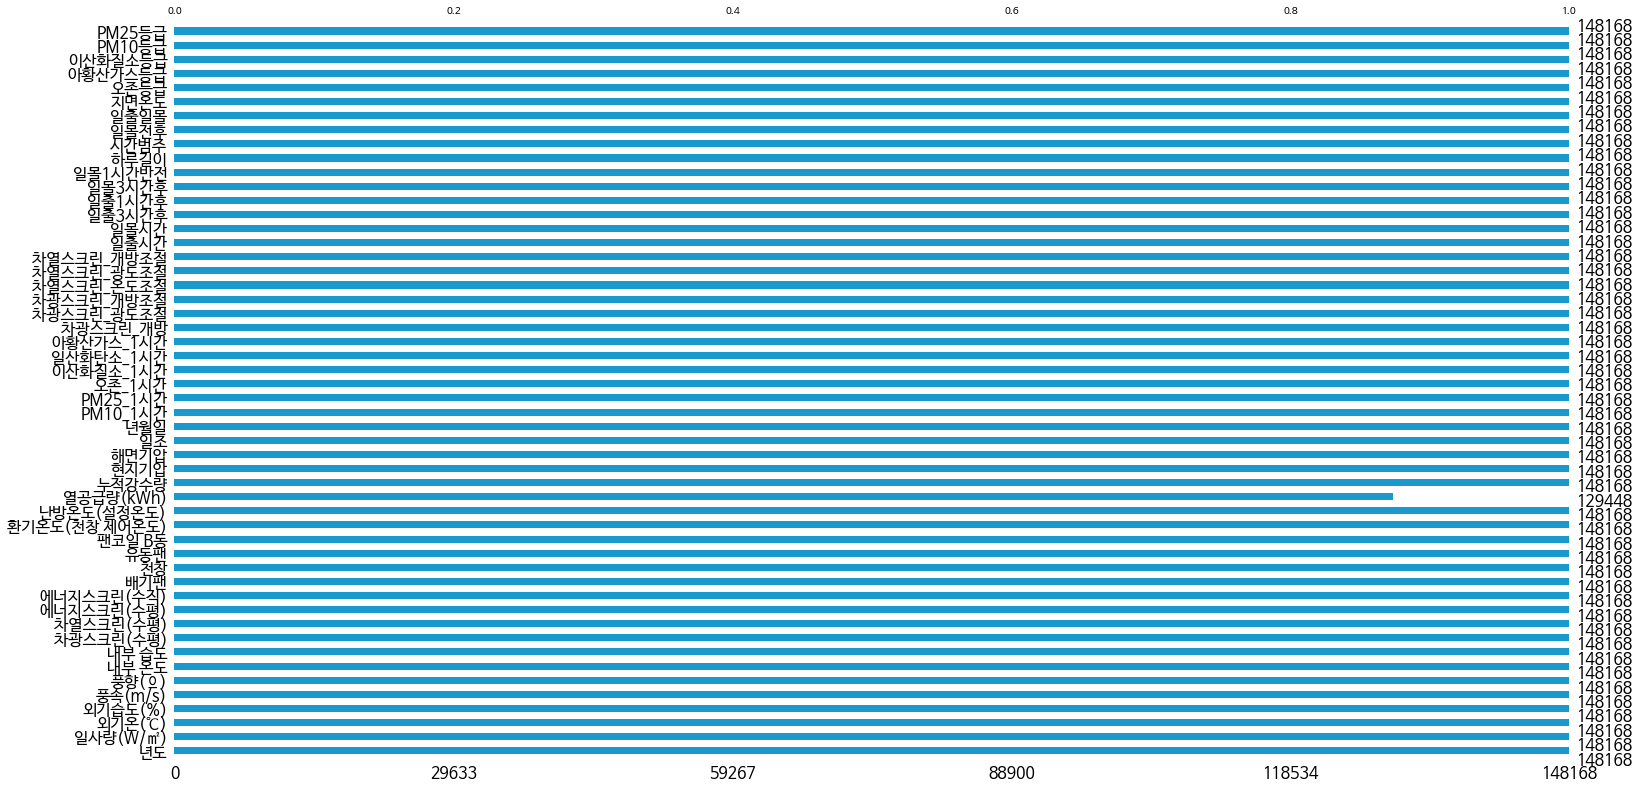

In [ ]:
msno.bar(data, color=(0.1, 0.6, 0.8))

In [ ]:
# 문자열 형식의 컬럼만 추출하기
object_lst = []

# 숫자 형식의 컬럼만 추출하기
num_lst = []

for col in data.columns:
    if data[col].dtype == "object":
        object_lst.append(col)
    
    else:
        num_lst.append(col)

In [ ]:
data_scaled = data.copy()

# 근데 스케일링 해서 학습하면 단일 값에 대해 실시간으로 처리할 때 어떻게 처리함..?
num_lst_nodate = [x for x in num_lst if x not in ["년도", "배기팬","유동팬","팬코일 B동","환기온도(천창 제어온도)","내부 온도"]]

loglist=[]
# 왜도 3 이상인 설명변수 log1p 변환
for val in num_lst_nodate:
    if abs(data_scaled[val].skew())>3:
        data_scaled[val] = np.log1p(data_scaled[val])
        loglist.append(val)
loglist

['천창', '누적강수량', '아황산가스_1시간']

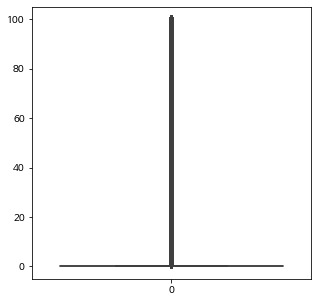

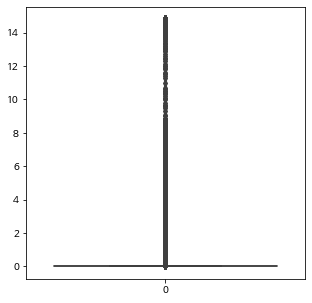

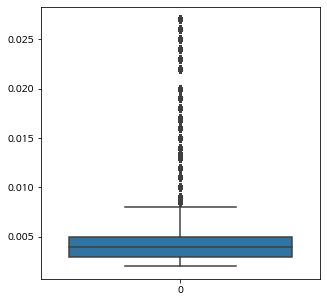

In [ ]:
for log in loglist:
  plt.figure(figsize= (5,5))
  sns.boxplot(data= data[log])

In [ ]:
# 근데 스케일링 해서 학습하면 단일 값에 대해 실시간으로 처리할 때 어떻게 처리함..?

# from sklearn.preprocessing import StandardScaler

# for col in num_lst_nodate:
#     std = StandardScaler()

#     data_scaled[col] = std.fit_transform(data_scaled[col].values.reshape(-1,1))

In [ ]:
Y = data_scaled["내부 온도"]

X_dummy = pd.get_dummies(data_scaled.drop(["년월일","내부 온도"],axis=1)
                         ,columns=['년도', '차광스크린_광도조절',
 '차광스크린_개방조절',
 '차열스크린_온도조절',
 '차열스크린_광도조절',
 '차열스크린_개방조절',
 '시간범주',
 '일몰전후',
 '일출일몰',
 '오존등급',
 '아황산가스등급',
 '이산화질소등급',
 'PM10등급',
 'PM25등급',
 '배기팬',
 '유동팬',
 '팬코일 B동',
 '환기온도(천창 제어온도)',
 '차광스크린_개방'])

In [ ]:
X_dummy.columns

Index(['일사량(W/㎡)', '외기온(℃)', '외기습도(%)', '풍속(m/s)', '풍향(º)', '내부 습도',
       '차광스크린(수평)', '차열스크린(수평)', '에너지스크린(수평)', '에너지스크린(수직)', '천창',
       '난방온도(설정온도)', '열공급량(kWh)', '누적강수량', '현지기압', '해면기압', '일조', 'PM10_1시간',
       'PM25_1시간', '오존_1시간', '이산화질소_1시간', '일산화탄소_1시간', '아황산가스_1시간', '일출시간',
       '일몰시간', '일출3시간후', '일출1시간후', '일몰3시간후', '일몰1시간반전', '하루길이', '지면온도',
       '년도_2021', '년도_2022', '차광스크린_광도조절_1000미만', '차광스크린_개방조절_0%~30%개방',
       '차광스크린_개방조절_100%개방', '차광스크린_개방조절_30%~80%개방', '차광스크린_개방조절_80%~100%개방',
       '차열스크린_온도조절_23도~25도', '차열스크린_온도조절_23도미만', '차열스크린_온도조절_25도~26도',
       '차열스크린_온도조절_26도이상', '차열스크린_광도조절_800미만', '차열스크린_개방조절_0%~30%개방',
       '차열스크린_개방조절_100%개방', '차열스크린_개방조절_30%~70%개방', '차열스크린_개방조절_70%~100%개방',
       '시간범주_그외', '시간범주_야간', '시간범주_주간', '일몰전후_일몰1시간반_전', '일몰전후_일몰1시간반_후',
       '일출일몰_일몰', '일출일몰_일출', '오존등급_보통', '오존등급_좋음', '아황산가스등급_보통', '아황산가스등급_좋음',
       '이산화질소등급_나쁨', '이산화질소등급_보통', '이산화질소등급_좋음', 'PM10등급_나쁨', 'PM10등급_보통',
       'PM10등급_좋음', 'PM25등급_나쁨', 'PM25등급_보통

In [ ]:
data_scaled_final = pd.concat([X_dummy, Y], axis = 1)


train_data = data_scaled_final.iloc[:100000,:]
test_data = data_scaled_final.iloc[100000:129448:,:]

# 열공급량 없어서 다시 나눔
# train_data = data_scaled_final.iloc[:129448,:]
# test_data = data_scaled_final.iloc[129448:,:]

In [ ]:
train_data=sm.add_constant(train_data, has_constant = "add")
test_data=sm.add_constant(test_data, has_constant = "add")

In [ ]:
x_train = train_data.drop(["내부 온도"],axis=1)
y_train = train_data["내부 온도"]


x_test = test_data.drop(["내부 온도"],axis=1)
y_test = test_data["내부 온도"]

In [ ]:
full_model = sm.OLS(y_train,x_train)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  내부 온도   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 5.526e+04
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:39:30   Log-Likelihood:            -1.0188e+05
No. Observations:              100000   AIC:                         2.039e+05
Df Residuals:                   99943   BIC:                         2.044e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0002   1.27e-05    -13.561      0.000      -0.000      -0.000
일사량(W/㎡)                  0.0034   3.51e-05     95.986      0.000       0.003       0.003
외기온(℃)                    0.1452      0.001    103.088      0.000       0.142       0.148
외기습도(%)                  -0.0022      0.000     -9.196      0.000      -0.003      -0.002
풍속(m/s)                  -0.0288      0.002    -15.224      0.000      -0.032      -0.025
풍향(º)                    -0.0002   1.85e-05     -9.414      0.000      -0.000      -0.000
내부 습도                    -0.0320      0.000    -74.235      0.000      -0.033      -0.031
차광스크린(수평)                 0.0052      0.001      5.185      0.000       0.003       0.007
차열스크린(수평)                -0.0043      0.001     -4.120      0.000      -0.006      -0.002
에너지스크린(수평)                0.0081      0.000     41.495      0.000       0.008       0.008
에너지스크린(수직)                0.0064      0.000     38.737      0.000       0.006       0.007
천창                       -0.0995      0.004    -22.199      0.000      -0.108      -0.091
난방온도(설정온도)                0.7237      0.004    161.367      0.000       0.715       0.732
열공급량(kWh)                -0.2108      0.008    -26.757      0.000      -0.226      -0.195
누적강수량                    -0.2609      0.009    -28.886      0.000      -0.279      -0.243
현지기압                      1.9689      0.065     30.262      0.000       1.841       2.096
해면기압                     -1.9833      0.065    -30.639      0.000      -2.110      -1.856
일조                     4.725e-06   2.63e-07     17.989      0.000    4.21e-06    5.24e-06
PM10_1시간                 -0.0150      0.001    -24.196      0.000      -0.016      -0.014
PM25_1시간                  0.0245      0.001     30.344      0.000       0.023       0.026
오존_1시간                  -18.1194      0.538    -33.710      0.000     -19.173     -17.066
이산화질소_1시간               -15.2967      0.658    -23.231      0.000     -16.587     -14.006
일산화탄소_1시간                 0.2518      0.024     10.342      0.000       0.204       0.300
아황산가스_1시간               -23.3905      1.214    -19.275      0.000     -25.769     -21.012
일출시간                      0.0344      0.002     18.118      0.000       0.031       0.038
일몰시간                      0.0322      0.002     16.335      0.000       0.028       0.036
일출3시간후                   -0.0174      0.002     -8.975      0.000      -0.021      -0.014
일출1시간후                    0.0171      0.001     26.613      0.000       0.016       0.018
일몰3시간후                   -0.0196      0.002    -10.561      0.000      -0.023      -0.016
일몰1시간반전                  -0.0042      0.000    -16.251      0.000      -0.005      -0.004
하루길이                      0.0009      0.000      4.776      0.000       0.001       0.001
지면온도                   

In [ ]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
vif["features"] = train_data.columns
vif[vif['VIF Factor']>=10]

,VIF Factor,features
1,11.850362,일사량(W/㎡)
2,12.797849,외기온(℃)
7,495.546430,차광스크린(수평)
8,569.931870,차열스크린(수평)
9,15.717560,에너지스크린(수평)
...,...,...
76,inf,환기온도(천창 제어온도)_28
77,inf,환기온도(천창 제어온도)_30
78,inf,차광스크린_개방_0
79,inf,차광스크린_개방_1


In [ ]:
len(vif[vif['VIF Factor']>=10])

65

In [ ]:
# x_train.drop(vif_list, axis=1, inplace=True)
# x_test.drop(vif_list, axis=1, inplace=True)

In [ ]:
# X_train = sm.add_constant(x_train)
# model = sm.OLS(y_train, X_train).fit()
# print(model.summary())

In [ ]:
# def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
#     import statsmodels.api as sm
#     import matplotlib.pyplot as plt
#     import warnings
#     warnings.filterwarnings("ignore")
    
#     y = y_train ## 반응 변수

#     selected_variables = [] ## 선택된 변수들
#     sl_enter = 0.05
#     sl_remove = 0.05
    
#     sv_per_step = [] ## 각 스텝별로 선택된 변수들
#     adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
#     steps = [] ## 스텝
#     step = 0
#     while len(variables) > 0:
#         remainder = list(set(variables) - set(selected_variables))
#         pval = pd.Series(index=remainder) ## 변수의 p-value
#         ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
#         ## 선형 모형을 적합한다.
#         for col in remainder: 
#             X = X_train[selected_variables+[col]]
#             X = sm.add_constant(X)
#             model = sm.OLS(y,X).fit(disp=0)
#             pval[col] = model.pvalues[col]
    
#         min_pval = pval.min()
#         if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
#             selected_variables.append(pval.idxmin())
#             ## 선택된 변수들에대해서
#             ## 어떤 변수를 제거할지 고른다.
#             while len(selected_variables) > 0:
#                 selected_X = X_train[selected_variables]
#                 selected_X = sm.add_constant(selected_X)
#                 selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
#                 max_pval = selected_pval.max()
#                 if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
#                     remove_variable = selected_pval.idxmax()
#                     selected_variables.remove(remove_variable)
#                 else:
#                     break
            
#             step += 1
#             steps.append(step)
#             adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
#             adjusted_r_squared.append(adj_r_squared)
#             sv_per_step.append(selected_variables.copy())
#         else:
#             break

#     fig = plt.figure(figsize=(100,10))
#     fig.set_facecolor('white')
    
#     font_size = 15
#     plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
#     plt.plot(steps,adjusted_r_squared, marker='o')
      
#     plt.ylabel('Adjusted R Squared',fontsize=font_size)
#     plt.grid(True)
#     plt.show()

#     return selected_variables

# selected_variables = stepwise_feature_selection(X_train, y_train)

In [ ]:
# model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[selected_variables]))).fit(disp=0)
# print(model.summary())

In [ ]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

In [ ]:
import time
import itertools 

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const']),k) :
		# 각 변수 조합을 고려한 경우의수
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
	
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model
    

In [ ]:
### 전진석택법(step=1)

def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", str(toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
      Forward_result = forward(X=X,y=y,predictors=predictors)
      if (i > 1):
        if Forward_result["AIC"] > Fmodel_before:
            break
      Fmodels.loc[i] = Forward_result
      predictors = Fmodels.loc[i]["model"].model.exog_names
      Fmodel_before = Fmodels.loc[i]["AIC"]
      predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])
		

In [ ]:
Forward_best_model = forward_model(X=x_train, y=y_train)

In [ ]:
Forward_best_model.aic

203871.07293831103

In [ ]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  내부 온도   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 5.839e+04
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:59:26   Log-Likelihood:            -1.0188e+05
No. Observations:              100000   AIC:                         2.039e+05
Df Residuals:                   99946   BIC:                         2.044e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
차열스크린_온도조절_23도미만         -3.7631      0.018   -208.996      0.000      -3.798      -3.728
난방온도(설정온도)                0.7237      0.004    161.592      0.000       0.715       0.733
외기온(℃)                    0.1452      0.001    103.331      0.000       0.142       0.148
일사량(W/㎡)                  0.0034    3.5e-05     96.156      0.000       0.003       0.003
차열스크린_온도조절_23도~25도       -1.8235      0.015   -120.457      0.000      -1.853      -1.794
환기온도(천창 제어온도)_27         -0.3135      0.014    -22.116      0.000      -0.341      -0.286
에너지스크린(수직)                0.0064      0.000     39.137      0.000       0.006       0.007
내부 습도                    -0.0320      0.000    -74.379      0.000      -0.033      -0.031
차열스크린_개방조절_100%개방         0.4992      0.033     14.932      0.000       0.434       0.565
차열스크린_온도조절_25도~26도       -0.7297      0.014    -52.531      0.000      -0.757      -0.703
시간범주_야간                   0.2971      0.013     23.184      0.000       0.272       0.322
열공급량(kWh)                -0.2108      0.008    -26.779      0.000      -0.226      -0.195
일출1시간후                    0.0341      0.001     42.507      0.000       0.033       0.036
배기팬_0                     0.4190      0.013     32.393      0.000       0.394       0.444
일몰3시간후                    0.0126      0.000     48.206      0.000       0.012       0.013
일몰전후_일몰1시간반_전            -0.6199      0.018    -35.299      0.000      -0.654      -0.585
에너지스크린(수평)                0.0081      0.000     41.941      0.000       0.008       0.008
차광스크린(수평)                 0.0049      0.000     22.306      0.000       0.004       0.005
일몰1시간반전                  -0.0042      0.000    -16.259      0.000      -0.005      -0.004
PM10등급_좋음                 0.5542      0.034     16.179      0.000       0.487       0.621
환기온도(천창 제어온도)_30         -0.2147      0.021    -10.450      0.000      -0.255      -0.174
차광스크린_개방_0               -0.4276      0.013    -31.907      0.000      -0.454      -0.401
천창                       -0.0995      0.004    -22.203      0.000      -0.108      -0.091
PM25_1시간                  0.0246      0.001     30.494      0.000       0.023       0.026
PM10_1시간                 -0.0150      0.001    -24.207      0.000      -0.016      -0.014
누적강수량                    -0.2611      0.009    -29.037      0.000      -0.279      -0.243
해면기압                     -1.9832      0.065    -30.638      0.000      -2.110      -1.856
현지기압                      1.9688      0.065     30.260      0.000       1.841       2.096
PM25등급_보통                 0.0572      0.008      6.988      0.000       0.041       0.073
아황산가스_1시간               -23.3486      1.207    -19.341      0.000     -25.715     -20.982
지면온도                     -0.0292      0.001    -21.702      0.000      -0.032      -0.027
오존_1시간                 

In [ ]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backward_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(x_train,y_train,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])

In [ ]:
# Backward_best_model = backward_model(x_train, y_train)

In [ ]:
# Backward_best_model.aic

In [ ]:
# Backward_best_model.summary()

In [ ]:
## 후진 소거법
variables = list(x_train.columns.difference(['const']))
 
y = y_train
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(train_data[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(train_data[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['PM10_1시간',
 'PM10등급_나쁨',
 'PM10등급_보통',
 'PM10등급_좋음',
 'PM25_1시간',
 'PM25등급_나쁨',
 'PM25등급_보통',
 '난방온도(설정온도)',
 '내부 습도',
 '년도_2021',
 '년도_2022',
 '누적강수량',
 '배기팬_0',
 '배기팬_1',
 '시간범주_야간',
 '시간범주_주간',
 '아황산가스_1시간',
 '아황산가스등급_보통',
 '아황산가스등급_좋음',
 '에너지스크린(수직)',
 '에너지스크린(수평)',
 '열공급량(kWh)',
 '오존_1시간',
 '오존등급_보통',
 '오존등급_좋음',
 '외기습도(%)',
 '외기온(℃)',
 '유동팬_0',
 '유동팬_1',
 '이산화질소_1시간',
 '이산화질소등급_나쁨',
 '이산화질소등급_보통',
 '이산화질소등급_좋음',
 '일몰1시간반전',
 '일몰3시간후',
 '일몰시간',
 '일몰전후_일몰1시간반_전',
 '일몰전후_일몰1시간반_후',
 '일사량(W/㎡)',
 '일산화탄소_1시간',
 '일조',
 '일출1시간후',
 '일출3시간후',
 '일출시간',
 '일출일몰_일몰',
 '일출일몰_일출',
 '지면온도',
 '차광스크린(수평)',
 '차광스크린_개방_0',
 '차광스크린_개방_1',
 '차광스크린_개방조절_80%~100%개방',
 '차광스크린_광도조절_1000미만',
 '차열스크린(수평)',
 '차열스크린_개방조절_0%~30%개방',
 '차열스크린_개방조절_100%개방',
 '차열스크린_개방조절_30%~70%개방',
 '차열스크린_광도조절_800미만',
 '차열스크린_온도조절_23도~25도',
 '차열스크린_온도조절_23도미만',
 '차열스크린_온도조절_25도~26도',
 '차열스크린_온도조절_26도이상',
 '천창',
 '팬코일 B동_0.0',
 '팬코일 B동_0.5',
 '팬코일 B동_1.0',
 '풍속(m/s)',
 '풍향(º)',
 '하루길이',
 '해면기압',
 '현지기압',
 '환기온도(천창 제어온도)_27',
 '

In [ ]:
Backward_best_model=processSubset(x_train,y_train,selected_variables)


In [ ]:
Backward_best_model['AIC']

203872.94713170626

In [ ]:
Backward_best_model['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  내부 온도   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 5.731e+04
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:59:54   Log-Likelihood:            -1.0188e+05
No. Observations:              100000   AIC:                         2.039e+05
Df Residuals:                   99945   BIC:                         2.044e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
PM10_1시간                 -0.0150      0.001    -24.197      0.000      -0.016      -0.014
PM10등급_나쁨                -0.3067      0.022    -14.043      0.000      -0.350      -0.264
PM10등급_보통                 0.0606      0.010      5.937      0.000       0.041       0.081
PM10등급_좋음                 0.2460      0.013     18.902      0.000       0.220       0.272
PM25_1시간                  0.0245      0.001     30.352      0.000       0.023       0.026
PM25등급_나쁨                -0.0662      0.018     -3.693      0.000      -0.101      -0.031
PM25등급_보통                 0.0572      0.008      6.984      0.000       0.041       0.073
난방온도(설정온도)                0.7237      0.004    161.433      0.000       0.715       0.732
내부 습도                    -0.0320      0.000    -74.246      0.000      -0.033      -0.031
년도_2021                   0.0718      0.006     12.486      0.000       0.061       0.083
년도_2022                  -0.0720      0.006    -12.505      0.000      -0.083      -0.061
누적강수량                    -0.2608      0.009    -28.891      0.000      -0.279      -0.243
배기팬_0                     0.2095      0.006     32.382      0.000       0.197       0.222
배기팬_1                    -0.2096      0.006    -32.400      0.000      -0.222      -0.197
시간범주_야간                   0.1434      0.018      7.970      0.000       0.108       0.179
시간범주_주간                  -0.1539      0.018     -8.718      0.000      -0.188      -0.119
아황산가스_1시간               -23.3923      1.214    -19.277      0.000     -25.771     -21.014
아황산가스등급_보통               -0.0959      0.021     -4.665      0.000      -0.136      -0.056
아황산가스등급_좋음                0.0958      0.021      4.657      0.000       0.055       0.136
에너지스크린(수직)                0.0064      0.000     39.129      0.000       0.006       0.007
에너지스크린(수평)                0.0081      0.000     41.939      0.000       0.008       0.008
열공급량(kWh)                -0.2107      0.008    -26.756      0.000      -0.226      -0.195
오존_1시간                  -18.1215      0.537    -33.717      0.000     -19.175     -17.068
오존등급_보통                   0.0757      0.004     17.377      0.000       0.067       0.084
오존등급_좋음                  -0.0759      0.004    -17.418      0.000      -0.084      -0.067
외기습도(%)                  -0.0022      0.000     -9.195      0.000      -0.003      -0.002
외기온(℃)                    0.1452      0.001    103.090      0.000       0.142       0.148
유동팬_0                    -0.0346      0.006     -5.507      0.000      -0.047      -0.022
유동팬_1                     0.0344      0.006      5.480      0.000       0.022       0.047
이산화질소_1시간               -15.3010      0.658    -23.243      0.000     -16.591     -14.011
이산화질소등급_나쁨                0.2100      0.027      7.703      0.000       0.157       0.263
이산화질소등급_보통             

In [ ]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])

In [ ]:
Stepwise_best_model = Stepwise_model(x_train, y_train)

Processed  79 models on 1 predictors in 1.4080560207366943
Selected predictors: ['차열스크린_온도조절_23도미만', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc499171790>
forward
Processed 1 models on 0 predictors in 0.017789602279663086
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc4990bff10>
Processed  78 models on 2 predictors in 1.8682427406311035
Selected predictors: ['차열스크린_온도조절_23도미만', '난방온도(설정온도)', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc499171950>
forward
Processed 2 models on 1 predictors in 0.03550553321838379
Selected predictors : ['차열스크린_온도조절_23도미만', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc499163c90>
Processed  77 models on 3 predictors in 2.2531023025512695
Selected predictors: ['차열스크린_온도조절_23도미만', '난방온도(설정온도)', '외기온(℃)', 'const'] AIC:  <statsmodels.regression.linear_mo

In [ ]:
Stepwise_best_model.aic

In [ ]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

In [ ]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model.predict(x_test)
pred_y_forward = Forward_best_model.predict(x_test[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(x_test[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(x_test[Stepwise_best_model.model.exog_names])

In [ ]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인할 예정

perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(y_test,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(y_test,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(y_test,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(y_test,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(y_test, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(y_test, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(y_test, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(y_test, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(y_test, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(y_test, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(y_test, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(y_test, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(y_test, pred_y_stepwise)

print(perf_mat)

In [ ]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
vif["features"] = train_data.columns
vif[vif['VIF Factor']>=10]

In [ ]:
# x_train.drop(vif_list, axis=1, inplace=True)
# x_test.drop(vif_list, axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True,cmap='Blues', fmt='.2f') 

In [9]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import jinja2
from pycaret.utils import check_metric
from pycaret.classification import *
from pycaret.regression import *

data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final.csv")

In [31]:
train_data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final_dummied_train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final_dummied_test.csv")
train_data.shape, test_data.shape

((100000, 80), (29448, 80))

In [32]:
# 문자열 형식의 컬럼만 추출하기
object_lst = []

# 숫자 형식의 컬럼만 추출하기
num_lst = []

for col in data.columns:
    if data[col].dtype == "object":
        object_lst.append(col)
    
    else:
        num_lst.append(col)

In [33]:
data_scaled = data.copy()

# 근데 스케일링 해서 학습하면 단일 값에 대해 실시간으로 처리할 때 어떻게 처리함..?
num_lst_nodate = [x for x in num_lst if x not in ["년도", "배기팬","유동팬","팬코일 B동","환기온도(천창 제어온도)","내부 온도"]]

loglist=[]
# 왜도 3 이상인 설명변수 log1p 변환
for val in num_lst_nodate:
    if abs(data_scaled[val].skew())>3:
        data_scaled[val] = np.log1p(data_scaled[val])
        loglist.append(val)
loglist

['천창', '누적강수량', '아황산가스_1시간']

In [34]:
Y = data_scaled["내부 온도"]

X_dummy = pd.get_dummies(data_scaled.drop(["년월일","내부 온도"],axis=1)
                         ,columns=['차광스크린_광도조절',
                                    '차광스크린_개방조절',
                                    '차열스크린_온도조절',
                                    '차열스크린_광도조절',
                                    '차열스크린_개방조절',
                                    '시간범주',
                                    '일몰전후',
                                    '일출일몰',
                                    '오존등급',
                                    '아황산가스등급',
                                    '이산화질소등급',
                                    'PM10등급',
                                    'PM25등급',
                                    '배기팬',
                                    '유동팬',
                                    '팬코일 B동',
                                    '환기온도(천창 제어온도)',
                                    '차광스크린_개방'])

In [35]:
data_scaled_final = pd.concat([X_dummy, Y], axis = 1)
data_scaled_final.shape

(148168, 84)

In [36]:
data_scaled_final=sm.add_constant(data_scaled_final, has_constant = "add")
data_scaled_final.drop(['열공급량(kWh)'], axis=1, inplace=True)

In [37]:
data_scaled_final.to_csv("/content/drive/MyDrive/Smart Farm/Data/data_scaled_final.csv", index=False)

In [38]:
data_scaled_final=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/data_scaled_final.csv")
data_scaled_final.shape

(148168, 84)

In [39]:
train_data = data_scaled_final.iloc[:129448,:]

test_data = data_scaled_final.iloc[129448:,:]

In [40]:
vif10=np.load('/content/drive/MyDrive/Smart Farm/Data/vif10.npy', allow_pickle=True)
vif10_forward=np.load('/content/drive/MyDrive/Smart Farm/Data/vif10_forward.npy', allow_pickle=True)
vif10_backward=np.load('/content/drive/MyDrive/Smart Farm/Data/vif10_backward.npy', allow_pickle=True)
vif10_stepwise=np.load('/content/drive/MyDrive/Smart Farm/Data/vif10_stepwise.npy', allow_pickle=True)
forward=np.load('/content/drive/MyDrive/Smart Farm/Data/forward.npy', allow_pickle=True)
backward=np.load('/content/drive/MyDrive/Smart Farm/Data/backward.npy', allow_pickle=True)
stepwise=np.load('/content/drive/MyDrive/Smart Farm/Data/stepwise.npy', allow_pickle=True)

In [41]:
cols=[vif10, vif10_forward, vif10_backward, vif10_stepwise, forward, backward, stepwise]

In [42]:
X_test = train_data.drop(['내부 온도'], axis=1)[cols[4]]
y_test = train_data['내부 온도']

X_val = test_data.drop(['내부 온도'], axis=1)[cols[4]]
y_val = test_data['내부 온도']

In [43]:
def model_with_cols(columns):
        columns=np.append(columns, np.array(['내부 온도']))
        columns=columns[columns!='const']
        reg_lunch=setup(
                data=train_data[columns],
                target='내부 온도',
                train_size=0.8,
                imputation_type='simple',
                data_split_shuffle=False,
                normalize = False,
                normalize_method = 'zscore',
                fold_strategy = 'timeseries',
                fold = 5,
                verbose=True,
                silent= True,
                session_id=123)
        top3_model=compare_models(sort='RMSE',n_select=3,round=4,cross_validation=True,verbose=True,errors='ignore')
        return top3_model

In [24]:
model_with_cols(cols[0])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-4139e84a98ee>", line 1, in <module>
    model_with_cols(cols[0])
  File "<ipython-input-23-94b96fce3180>", line 5, in model_with_cols
    data=train_data[columns],
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 3464, in __getitem__
    indexer = self.loc._get_listlike_indexer(key, axis=1)[1]
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 1314, in _get_listlike_indexer
    self._validate_read_indexer(keyarr, indexer, axis)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py", line 1377, in _validate_read_indexer
    raise KeyError(f"{not_found} not in index")
KeyError: "['열공급량(kWh)'] not in index"

During handling of the above exception, another exception occurred:

Traceback (most recent call 

KeyError: ignored

In [ ]:
model_with_cols(cols[1]) 

In [ ]:
model_with_cols(cols[2]) 

In [ ]:
model_with_cols(cols[3]) 

In [ ]:
model_with_cols(cols[5]) # 0.591

In [ ]:
model_with_cols(cols[6]) # 0.5379

In [82]:
top3_model=model_with_cols(cols[4]) # 0.5379

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4102,0.4247,0.6307,0.9711,0.0337,0.0224,12.590
gbr,Gradient Boosting Regressor,0.4277,0.4110,0.6328,0.9718,0.0336,0.0230,7.088
lightgbm,Light Gradient Boosting Machine,0.4222,0.4341,0.6402,0.9702,0.0345,0.0229,0.656
rf,Random Forest Regressor,0.4299,0.4753,0.6603,0.9674,0.0357,0.0234,20.264
dt,Decision Tree Regressor,0.5205,0.6480,0.7707,0.9555,0.0409,0.0280,0.410
ada,AdaBoost Regressor,0.6331,0.7121,0.8277,0.9515,0.0435,0.0341,5.932
omp,Orthogonal Matching Pursuit,0.6291,0.9650,0.9501,0.9346,0.0488,0.0337,0.058
br,Bayesian Ridge,0.8189,1.1521,1.0402,0.9212,0.0533,0.0432,0.208
ridge,Ridge Regression,0.8616,1.2963,1.0814,0.9112,0.0555,0.0453,0.058
en,Elastic Net,0.9721,1.5255,1.2251,0.8932,0.0592,0.0496,0.106


In [83]:
lightgbm_model=create_model('lightgbm',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4084,0.3208,0.5664,0.9755,0.0280,0.0207
1,0.5009,0.5792,0.7610,0.9617,0.0417,0.0286
2,0.3203,0.1821,0.4267,0.9873,0.0218,0.0171
3,0.3572,0.3344,0.5783,0.9780,0.0325,0.0199
4,0.5244,0.7540,0.8684,0.9485,0.0483,0.0279
Mean,0.4222,0.4341,0.6402,0.9702,0.0345,0.0229
Std,0.0793,0.2048,0.1559,0.0136,0.0095,0.0046


In [84]:
tuned_top3_model=[tune_model(i) for i in top3_model]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4203,0.3313,0.5756,0.9747,0.0277,0.0210
1,0.5188,0.6221,0.7887,0.9589,0.0433,0.0297
2,0.3151,0.1939,0.4403,0.9865,0.0220,0.0166
3,0.3683,0.3450,0.5874,0.9773,0.0332,0.0205
4,0.5714,0.8680,0.9317,0.9407,0.0521,0.0305
Mean,0.4388,0.4721,0.6647,0.9676,0.0356,0.0237
Std,0.0944,0.2419,0.1737,0.0161,0.0108,0.0055


In [85]:
ens_model=blend_models(estimator_list= tuned_top3_model, fold=5, optimize='RMSE',round= 4,verbose=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4096,0.3061,0.5533,0.9766,0.0271,0.0207
1,0.5388,0.6751,0.8216,0.9554,0.0453,0.0310
2,0.3222,0.1900,0.4359,0.9868,0.0223,0.0173
3,0.4086,0.4170,0.6458,0.9726,0.0374,0.0232
4,0.4958,0.5757,0.7587,0.9606,0.0413,0.0264
Mean,0.4350,0.4328,0.6431,0.9704,0.0346,0.0237
Std,0.0755,0.1757,0.1387,0.0112,0.0087,0.0047


In [86]:
final_model = finalize_model(ens_model)

In [87]:
best_auc_model = automl(optimize = 'rmse') 

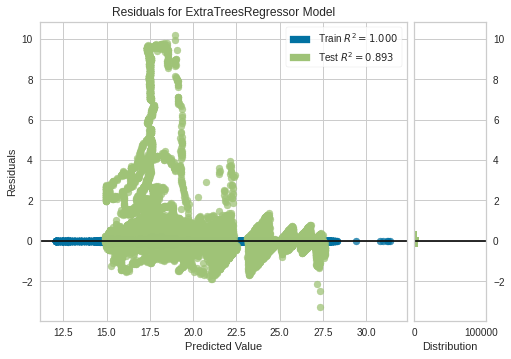

In [88]:
plot_model(best_auc_model)

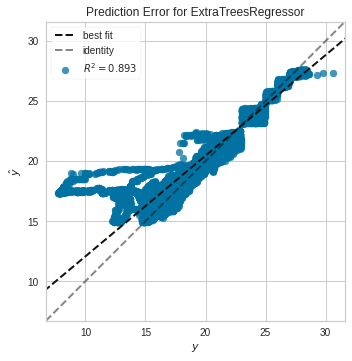

In [89]:
plot_model(best_auc_model, plot = 'error')

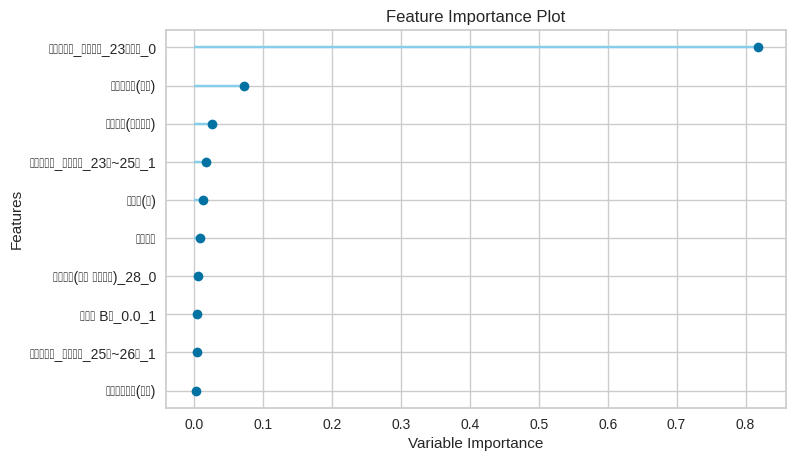

In [90]:
plot_model(best_auc_model, plot = 'feature')

In [91]:
pred_holdout = predict_model(best_auc_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6588,2.3467,1.5319,0.8935,0.1037,0.0486


In [92]:
check_metric(pred_holdout['내부 온도'], pred_holdout['Label'], metric='RMSE')

1.5319

In [93]:
# data=pd.read_csv("/content/drive/MyDrive/Smart Farm/Data/smart_farm_final.csv")
# test_data.index=data['시간'][100000:129448]

In [94]:
save_model(best_auc_model, '/content/drive/MyDrive/Smart Farm/Data/best_auc_model.pkl') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='내부 온도',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                   

In [21]:
saved_best_auc_model = load_model('/content/drive/MyDrive/Smart Farm/Data/best_auc_model.pkl')

Transformation Pipeline and Model Successfully Loaded


# Pseudo

In [53]:
# 양의 효과
def effect_plus():
    """
    배기팬, 유동팬, 천창(0): 0(정지)
    팬코일: 1(작동) -> 지금 팬코일 0.0이 선택돼서 바꿈
    차광스크린: 0%(감소)
    차열스크린: 0%(감소)
    에너지스크린(수평): 0%(감소)
    에너지스크린(수직): 0%(감소)

    """
    #print("작동: 양의 방향")
    #print("------------------------")
    return [0, 0, 0, 0, 0, 0, 0, 0]

# 음의 효과
def effect_minus():
    """
    배기팬, 유동팬, 천창(100): 1(작동)
    팬코일: 0(정지)
    차광스크린: 100%(증가)
    차열스크린: 100%(증가)
    에너지스크린(수평): 100%(증가)
    에너지스크린(수직): 100%(증가)

    """
    #print("작동: 음의 방향")
    #print("------------------------")
    return [1, 1, 100, 1, 100, 100, 100, 100]
    

In [54]:
# 예측값에 의한 작동
def manipulate(curr_temps, pred_temps, max_thres, min_thres, RRS):
    # 온도 차
    temp_diff = pred_temp - curr_temps
    
    # RRS 적용 시 
    ## temp_diff*=RRS
    
    # 최소 온도 > 예측 온도 : 상승
    if (min_thres > pred_temp):
        #print("현재 온도: %d\n예측 온도: %d\n최대 온도: %d\n최소 온도: %d"%(curr_temps, pred_temp, max_thres, min_thres))
        return effect_plus()
    
    # 최대 온도 > 예측 온도 > 최소 온도: 유지
    elif (max_thres > pred_temp) and (pred_temp > min_thres):
        #print("현재 온도: %d\n예측 온도: %d\n최대 온도: %d\n최소 온도: %d"%(curr_temps, pred_temp, max_thres, min_thres))
        #print("작동 정지: 온도가 적정 범위 내에 있음")
        #print("------------------------")
        return [-1, -1, -1, -1, -1, -1, -1, -1 ]

    # 예측 온도 > 최대 온도: 하강
    elif (pred_temp > max_thres):
        #print("현재 온도: %d\n예측 온도: %d\n최대 온도: %d\n최소 온도: %d"%(curr_temps, pred_temp, max_thres, min_thres))
        return effect_minus()

    # elif 에러에러 하나 있음, 처리 필요
    else: 
        #print("현재 온도: %d\n예측 온도: %d\n최대 온도: %d\n최소 온도: %d"%(curr_temps, pred_temp, max_thres, min_thres))
        #print("에러에러")
        return [-1, -1, -1, -1, -1, -1, -1, -1 ]

In [55]:
import pandas as pd
from keras.models import Sequential, load_model

RRS = 0.7

In [56]:
# demonstrate prediction
X_plot=X_val
y_plot=y_val
y_predict=[]


In [57]:
pred_holdout = predict_model(saved_best_auc_model, data=pd.concat([test_data[cols[4]], y_val], axis=1))

In [58]:
check_metric(pred_holdout['내부 온도'], pred_holdout['Label'], metric='RMSE')

0.9271

In [59]:
X_plot.columns

Index(['차열스크린_온도조절_23도미만', '난방온도(설정온도)', '외기온(℃)', '일사량(W/㎡)',
       '차열스크린_온도조절_23도~25도', '환기온도(천창 제어온도)_27', '에너지스크린(수직)', '내부 습도',
       '차열스크린_개방조절_100%개방', '차열스크린_온도조절_25도~26도', '시간범주_야간', '일출1시간후', '배기팬_1',
       '일몰전후_일몰1시간반_전', '에너지스크린(수평)', '일몰3시간후', '시간범주_그외', '팬코일 B동_0.0',
       '일몰1시간반전', 'PM10등급_좋음', '차광스크린(수평)', 'PM25_1시간', 'PM10_1시간', '누적강수량',
       '해면기압', '현지기압', '차광스크린_개방_0', '천창', 'PM25등급_보통', '아황산가스_1시간', '지면온도',
       '오존_1시간', '이산화질소_1시간', '오존등급_보통', '일조', '풍속(m/s)', '환기온도(천창 제어온도)_28',
       '년도', 'PM10등급_나쁨', '일산화탄소_1시간', '풍향(º)', '외기습도(%)', '이산화질소등급_나쁨',
       '유동팬_0', '아황산가스등급_보통', '차열스크린_개방조절_0%~30%개방', '하루길이',
       '차광스크린_개방조절_80%~100%개방', 'PM25등급_좋음', '일출일몰_일출', '차열스크린(수평)',
       '차열스크린_개방조절_30%~70%개방', 'const'],
      dtype='object')

In [60]:
X_plot.head(5)

,차열스크린_온도조절_23도미만,난방온도(설정온도),외기온(℃),일사량(W/㎡),차열스크린_온도조절_23도~25도,환기온도(천창 제어온도)_27,에너지스크린(수직),내부 습도,차열스크린_개방조절_100%개방,차열스크린_온도조절_25도~26도,시간범주_야간,일출1시간후,배기팬_1,일몰전후_일몰1시간반_전,에너지스크린(수평),일몰3시간후,시간범주_그외,팬코일 B동_0.0,일몰1시간반전,PM10등급_좋음,차광스크린(수평),PM25_1시간,PM10_1시간,누적강수량,해면기압,현지기압,차광스크린_개방_0,천창,PM25등급_보통,아황산가스_1시간,지면온도,오존_1시간,이산화질소_1시간,오존등급_보통,일조,풍속(m/s),환기온도(천창 제어온도)_28,년도,PM10등급_나쁨,일산화탄소_1시간,풍향(º),외기습도(%),이산화질소등급_나쁨,유동팬_0,아황산가스등급_보통,차열스크린_개방조절_0%~30%개방,하루길이,차광스크린_개방조절_80%~100%개방,PM25등급_좋음,일출일몰_일출,차열스크린(수평),차열스크린_개방조절_30%~70%개방,const
129448,1,18.0,2.0,0.0,0,0,0,74.105,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,37849.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129449,1,18.0,2.0,0.0,0,0,0,73.585,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.4,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129450,1,18.0,1.9,0.0,0,0,0,73.980,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129451,1,18.0,1.9,0.0,0,0,0,73.690,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129452,1,18.0,1.9,0.0,0,0,0,73.625,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0


In [61]:
X_plot.reset_index(drop=True, inplace=True)

In [63]:
# 모델의 예측값
# yhat_list = [16, 17, 18, 19, 20, 21, 29, 30, 29, 25 ]
curr_temp = -1
pred_temp = y_test[0]

for i in range(1, len(X_plot)):
    # 하나씩 넣어야함(매차례 변동)
    # yhat = model.predict(x_test)
    yhat=predict_model(saved_best_auc_model, data=X_plot[i:i+1])['Label'].iloc[0]
    y_predict.append(yhat)
    curr_temp = pred_temp
    pred_temp = yhat
    if X_plot['환기온도(천창 제어온도)_27'][i-1]==1:
      max_thres=27
    elif X_plot['환기온도(천창 제어온도)_28'][i-1]==1:
      max_thres=28
    else:
      max_thres=30
    #max_thres = X_plot['환기온도(천창 제어온도)'][i-1]
    min_thres = X_plot['난방온도(설정온도)'][i-1]
    a, b, c, d, e, f, g, h = manipulate(curr_temp, pred_temp, max_thres, min_thres, RRS)
    if a != -1:
        X_plot['배기팬_1'][i], X_plot['유동팬_0'][i], X_plot['천창'][i], X_plot['팬코일 B동_0.0'][i], X_plot['차광스크린(수평)'][i], X_plot['차열스크린(수평)'][i], X_plot['에너지스크린(수평)'][i], X_plot['에너지스크린(수직)'][i]  = a, b, c, d, e, f, g, h


In [64]:
X_plot.head(10)

,차열스크린_온도조절_23도미만,난방온도(설정온도),외기온(℃),일사량(W/㎡),차열스크린_온도조절_23도~25도,환기온도(천창 제어온도)_27,에너지스크린(수직),내부 습도,차열스크린_개방조절_100%개방,차열스크린_온도조절_25도~26도,시간범주_야간,일출1시간후,배기팬_1,일몰전후_일몰1시간반_전,에너지스크린(수평),일몰3시간후,시간범주_그외,팬코일 B동_0.0,일몰1시간반전,PM10등급_좋음,차광스크린(수평),PM25_1시간,PM10_1시간,누적강수량,해면기압,현지기압,차광스크린_개방_0,천창,PM25등급_보통,아황산가스_1시간,지면온도,오존_1시간,이산화질소_1시간,오존등급_보통,일조,풍속(m/s),환기온도(천창 제어온도)_28,년도,PM10등급_나쁨,일산화탄소_1시간,풍향(º),외기습도(%),이산화질소등급_나쁨,유동팬_0,아황산가스등급_보통,차열스크린_개방조절_0%~30%개방,하루길이,차광스크린_개방조절_80%~100%개방,PM25등급_좋음,일출일몰_일출,차열스크린(수평),차열스크린_개방조절_30%~70%개방,const
0,1,18.0,2.0,0.0,0,0,0,74.105,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,37849.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
1,1,18.0,2.0,0.0,0,0,0,73.585,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.4,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
2,1,18.0,1.9,0.0,0,0,0,73.980,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
3,1,18.0,1.9,0.0,0,0,0,73.690,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
4,1,18.0,1.9,0.0,0,0,0,73.625,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
5,1,18.0,1.9,0.0,0,0,0,73.670,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
6,1,18.0,1.9,0.0,0,0,0,73.320,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
7,1,18.0,1.9,0.0,0,0,0,73.140,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
8,1,18.0,1.9,0.0,0,0,0,73.140,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
9,1,18.0,1.8,0.0,0,0,0,72.350,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0


In [65]:
test_data[cols[4]].head(10)

,차열스크린_온도조절_23도미만,난방온도(설정온도),외기온(℃),일사량(W/㎡),차열스크린_온도조절_23도~25도,환기온도(천창 제어온도)_27,에너지스크린(수직),내부 습도,차열스크린_개방조절_100%개방,차열스크린_온도조절_25도~26도,시간범주_야간,일출1시간후,배기팬_1,일몰전후_일몰1시간반_전,에너지스크린(수평),일몰3시간후,시간범주_그외,팬코일 B동_0.0,일몰1시간반전,PM10등급_좋음,차광스크린(수평),PM25_1시간,PM10_1시간,누적강수량,해면기압,현지기압,차광스크린_개방_0,천창,PM25등급_보통,아황산가스_1시간,지면온도,오존_1시간,이산화질소_1시간,오존등급_보통,일조,풍속(m/s),환기온도(천창 제어온도)_28,년도,PM10등급_나쁨,일산화탄소_1시간,풍향(º),외기습도(%),이산화질소등급_나쁨,유동팬_0,아황산가스등급_보통,차열스크린_개방조절_0%~30%개방,하루길이,차광스크린_개방조절_80%~100%개방,PM25등급_좋음,일출일몰_일출,차열스크린(수평),차열스크린_개방조절_30%~70%개방,const
129448,1,18.0,2.0,0.0,0,0,0,74.105,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,37849.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129449,1,18.0,2.0,0.0,0,0,0,73.585,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.4,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129450,1,18.0,1.9,0.0,0,0,0,73.980,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129451,1,18.0,1.9,0.0,0,0,0,73.690,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129452,1,18.0,1.9,0.0,0,0,0,73.625,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129453,1,18.0,1.9,0.0,0,0,0,73.670,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129454,1,18.0,1.9,0.0,0,0,0,73.320,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129455,1,18.0,1.9,0.0,0,0,0,73.140,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129456,1,18.0,1.9,0.0,0,0,0,73.140,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0
129457,1,18.0,1.8,0.0,0,0,0,72.350,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0


In [66]:
yhat_arr = np.array(y_predict)
np.save('/content/drive/MyDrive/Smart Farm/Data/yhat_arr.npy',yhat_arr)

In [78]:
concat_df=pd.concat([X_plot, pd.DataFrame(y_predict, columns=['내부 온도'])], axis=1)

In [79]:
concat_df.head()

,차열스크린_온도조절_23도미만,난방온도(설정온도),외기온(℃),일사량(W/㎡),차열스크린_온도조절_23도~25도,환기온도(천창 제어온도)_27,에너지스크린(수직),내부 습도,차열스크린_개방조절_100%개방,차열스크린_온도조절_25도~26도,시간범주_야간,일출1시간후,배기팬_1,일몰전후_일몰1시간반_전,에너지스크린(수평),일몰3시간후,시간범주_그외,팬코일 B동_0.0,일몰1시간반전,PM10등급_좋음,차광스크린(수평),PM25_1시간,PM10_1시간,누적강수량,해면기압,현지기압,차광스크린_개방_0,천창,PM25등급_보통,아황산가스_1시간,지면온도,오존_1시간,이산화질소_1시간,오존등급_보통,일조,풍속(m/s),환기온도(천창 제어온도)_28,년도,PM10등급_나쁨,일산화탄소_1시간,풍향(º),외기습도(%),이산화질소등급_나쁨,유동팬_0,아황산가스등급_보통,차열스크린_개방조절_0%~30%개방,하루길이,차광스크린_개방조절_80%~100%개방,PM25등급_좋음,일출일몰_일출,차열스크린(수평),차열스크린_개방조절_30%~70%개방,const,내부 온도
0,1,18.0,2.0,0.0,0,0,0,74.105,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,37849.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0,17.9195
1,1,18.0,2.0,0.0,0,0,0,73.585,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.4,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0,17.8920
2,1,18.0,1.9,0.0,0,0,0,73.980,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0,17.9160
3,1,18.0,1.9,0.0,0,0,0,73.690,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0,17.9230
4,1,18.0,1.9,0.0,0,0,0,73.625,0,0,1,754,0,0,0,2125,0,0,1655,0,0,18.0,38.0,0.0,1018.9,1015.2,1,0.0,1,0.003992,-1.8,0.061,0.011,1,0.0,0.0,1,2022,0,0.4,5,76,0,0,0,1,1131,0,0,0,0,0,1.0,17.9170


In [80]:
concat_df.to_csv("/content/drive/MyDrive/Smart Farm/Data/concat_df.csv")

In [81]:
y_val.reset_index(drop=True, inplace=True)

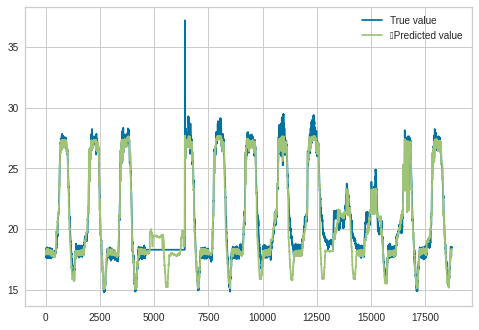

In [83]:
plt.plot(y_val, label="True value")
plt.plot(concat_df['내부 온도'][:18720], label="Predicted value")
plt.legend()
plt.show()

# SHAP


In [ ]:
feats=lightgbm_model.feature_name_

X_val = test_data.drop(['내부 온도'], axis=1)
y_val = test_data['내부 온도']
# 일출3시간후, 현지기압 사라짐.. 어데감..
# 뭔가 다 이상해져서.. rename... ㅜㅜ
X_val.rename(columns={'내부 습도':'내부_습도', '차열스크린_온도조절_23도미만':'차열스크린_온도조절_23도미만_1', '차열스크린_온도조절_23도~25도':'차열스크린_온도조절_23도~25도_0', '환기온도(천창 제어온도)_27':'환기온도(천창_제어온도)_27_1', 
                      '차열스크린_개방조절_100%개방':'차열스크린_개방조절_100%개방_0', '차열스크린_온도조절_25도~26도':'차열스크린_온도조절_25도~26도_0', '시간범주_야간':'시간범주_야간_0', '배기팬_0':'배기팬_0_1', '년도':'년도_2021',
                      '일몰전후_일몰1시간반_전':'일몰전후_일몰1시간반_전_0', 'PM10등급_좋음':'PM10등급_좋음_1', '환기온도(천창 제어온도)_28':'환기온도(천창_제어온도)_28_1', '차광스크린_개방_0':'차광스크린_개방_0_0', 'PM25등급_보통':'PM25등급_보통_1', 
                      '팬코일 B동_1.0':'팬코일_B동_1.0_0', '오존등급_좋음':'오존등급_좋음_1', 'PM10등급_나쁨':'PM10등급_나쁨_1', '시간범주_주간':'시간범주_주간_0', '이산화질소등급_나쁨':'이산화질소등급_나쁨_1', '유동팬_0':'유동팬_0_1', '차열스크린_개방조절_0%~30%개방':'차열스크린_개방조절_0%~30%개방_1', 
                      '아황산가스등급_좋음':'아황산가스등급_좋음_1', '차광스크린_개방조절_80%~100%개방':'차광스크린_개방조절_80%~100%개방_0', 'PM25등급_나쁨':'PM25등급_나쁨_1', '일출일몰_일몰':'일출일몰_일몰_0', '차열스크린_개방조절_70%~100%개방':'차열스크린_개방조절_70%~100%개방_0'}
                   , inplace=True)

In [ ]:
for i in range(len(X_val['년도_2021'])):
    if X_val['년도_2021'][i]==2022:
        X_val['년도_2021'][i]=0
    else:
        X_val['년도_2021'][i]=1

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap  # package used to calculate Shap values


# data_for_prediction = np.array()  # use 1 row of data here. Could use multiple rows if desired
# data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Create object that can calculate shap values
k_explainer = shap.Explainer(lightgbm_model) # Tree, Deep 있음

# Calculate Shap values
k_shap_values = k_explainer.shap_values(X_val[feats])

shap.force_plot(k_explainer.expected_value, k_shap_values)

In [ ]:
reg_lunch=setup(
        data=train_data,
        target='내부 온도',
        train_size=0.8,
        imputation_type='simple',
        categorical_features = ['년도',
                                '차광스크린_광도조절',
                                '차광스크린_개방조절',
                                '차열스크린_온도조절',
                                '차열스크린_광도조절',
                                '차열스크린_개방조절',
                                '시간범주',
                                '일몰전후',
                                '일출일몰',
                                '오존등급',
                                '아황산가스등급',
                                '이산화질소등급',
                                'PM10등급',
                                'PM25등급',
                                '배기팬',
                                '유동팬',
                                '팬코일 B동',
                                '환기온도(천창 제어온도)',
                                '차광스크린_개방'],
        data_split_shuffle=False,
        normalize = False,
        normalize_method = 'zscore',
        fold_strategy = 'timeseries',
        fold = 5,
        verbose=True,
        silent= True,
        session_id=123)

In [ ]:
models()

In [ ]:
top3_model=compare_models(sort='RMSE',n_select=3,round=4,cross_validation=True,verbose=True,errors='ignore')

In [ ]:
lightgbm_model=create_model('lightgbm',fold=5)

In [ ]:
# with tf.device('/device:GPU:0'):
#   tuned_top3_model=[tune_model(i) for i in top3_model]

In [ ]:

# with tf.device('/device:GPU:0'):
#   ens_model=blend_models(estimator_list= tuned_top3_model, fold=5, optimize='RMSE',round= 4,verbose=True)

In [ ]:
# final_model = finalize_model(ens_model)

# pred_holdout = predict_model(ens_model)

# pred= predict_model(final_model, data=test) 

In [ ]:
# check_metric(pred_holdout['내부 온도'], pred_holdout['Label'], metric='RMSE')

In [ ]:
plot_model(lightgbm_model)

In [ ]:
plot_model(lightgbm_model, plot = 'error')

In [ ]:
plot_model(lightgbm_model, plot='feature')

In [ ]:
et_model=create_model('et',fold=5)

In [ ]:
plot_model(et_model)

In [ ]:
plot_model(et_model, plot = 'error')

In [ ]:
plot_model(et_model, plot='feature')